# Loading all libraries

In [143]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm as SVM_MODEL
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Loading the dataset 1

In [144]:
df = pd.read_csv("lungcancer.csv")		

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 312 non-null    object 
 1   AGE                    312 non-null    int64  
 2   SMOKING                312 non-null    int64  
 3   YELLOW_FINGERS         312 non-null    int64  
 4   ANXIETY                312 non-null    int64  
 5   PEER_PRESSURE          311 non-null    float64
 6   CHRONIC DISEASE        311 non-null    float64
 7   FATIGUE                312 non-null    int64  
 8   ALLERGY                311 non-null    float64
 9   WHEEZING               312 non-null    int64  
 10  ALCOHOL CONSUMING      312 non-null    int64  
 11  COUGHING               312 non-null    int64  
 12  SHORTNESS OF BREATH    312 non-null    int64  
 13  SWALLOWING DIFFICULTY  312 non-null    int64  
 14  CHEST PAIN             312 non-null    int64  
 15  LUNG_C

In [146]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,312.000000,312.000000,312.000000,312.000000,311.000000,311.000000,312.000000,311.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,62.560897,1.557692,1.573718,1.493590,1.498392,1.508039,1.676282,1.556270,1.560897,1.557692,1.583333,1.641026,1.464744,1.560897
std,8.249884,0.497458,0.495330,0.500762,0.500803,0.500741,0.468645,0.497624,0.497075,0.497458,0.493799,0.480470,0.499557,0.497075
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [147]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1.0,1.0,2,1.0,2,2,2,2,2,2,YES
1,M,74,2,1,1,1.0,2.0,2,2.0,1,1,1,2,2,2,YES
2,F,59,1,1,1,2.0,1.0,2,1.0,2,1,2,2,1,2,NO
3,M,63,2,2,2,1.0,1.0,1,1.0,1,2,1,1,2,2,NO
4,F,63,1,2,1,1.0,1.0,1,1.0,2,1,2,2,1,1,NO


# Preprocessing

# Checking for null values

In [148]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            1
CHRONIC DISEASE          1
FATIGUE                  0
ALLERGY                  1
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# Removing null values

In [ ]:
df["PEER_PRESSURE"] = df["PEER_PRESSURE"].fillna(df["PEER_PRESSURE"].mode()[0])
df['CHRONIC DISEASE'] = df['CHRONIC DISEASE'].fillna(df['CHRONIC DISEASE'].mean())
df['ALCOHOL CONSUMING'] = df['ALCOHOL CONSUMING'].fillna(df['ALCOHOL CONSUMING'].median())
df['ALLERGY'] = df['ALLERGY'].fillna(df['ALLERGY'].median())
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# Checking for duplicate values

In [ ]:
df.duplicated().sum()

33

# Removing duplicate values

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 311
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 279 non-null    object 
 1   AGE                    279 non-null    int64  
 2   SMOKING                279 non-null    int64  
 3   YELLOW_FINGERS         279 non-null    int64  
 4   ANXIETY                279 non-null    int64  
 5   PEER_PRESSURE          279 non-null    float64
 6   CHRONIC DISEASE        279 non-null    float64
 7   FATIGUE                279 non-null    int64  
 8   ALLERGY                279 non-null    float64
 9   WHEEZING               279 non-null    int64  
 10  ALCOHOL CONSUMING      279 non-null    int64  
 11  COUGHING               279 non-null    int64  
 12  SHORTNESS OF BREATH    279 non-null    int64  
 13  SWALLOWING DIFFICULTY  279 non-null    int64  
 14  CHEST PAIN             279 non-null    int64  
 15  LUNG_CANCER

# Encoding values in GENDER AND LUNG_CANCER columns

In [ ]:
label_encoder = LabelEncoder()
df = pd.get_dummies(df, columns=['GENDER'])
df["GENDER_F"] = label_encoder.fit_transform(df["GENDER_F"])
df["GENDER_M"] = label_encoder.fit_transform(df["GENDER_M"])
df["F"] = df["GENDER_F"]
df["M"] = df["GENDER_M"]
df.drop(columns=["GENDER_F", "GENDER_M"], inplace=True)
df["LUNG_CANCER"] = label_encoder.fit_transform(df["LUNG_CANCER"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 311
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    279 non-null    int64  
 1   SMOKING                279 non-null    int64  
 2   YELLOW_FINGERS         279 non-null    int64  
 3   ANXIETY                279 non-null    int64  
 4   PEER_PRESSURE          279 non-null    float64
 5   CHRONIC DISEASE        279 non-null    float64
 6   FATIGUE                279 non-null    int64  
 7   ALLERGY                279 non-null    float64
 8   WHEEZING               279 non-null    int64  
 9   ALCOHOL CONSUMING      279 non-null    int64  
 10  COUGHING               279 non-null    int64  
 11  SHORTNESS OF BREATH    279 non-null    int64  
 12  SWALLOWING DIFFICULTY  279 non-null    int64  
 13  CHEST PAIN             279 non-null    int64  
 14  LUNG_CANCER            279 non-null    int32  
 15  F          

In [ ]:
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,F,M
0,69,1,2,2,1.0,1.0,2,1.0,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1.0,2.0,2,2.0,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2.0,1.0,2,1.0,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1.0,1.0,1,1.0,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1.0,1.0,1,1.0,2,1,2,2,1,1,0,1,0


# Changing column positions

In [ ]:
df = df[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY',
         'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'M',
         'F', 'LUNG_CANCER']]
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,M,F,LUNG_CANCER
0,69,1,2,2,1.0,1.0,2,1.0,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1.0,2.0,2,2.0,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2.0,1.0,2,1.0,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1.0,1.0,1,1.0,1,2,1,1,2,2,1,0,0
4,63,1,2,1,1.0,1.0,1,1.0,2,1,2,2,1,1,0,1,0


# Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,
                                                    random_state=42)

logistic_regression = LogisticRegression(max_iter=5000)
logistic_regression.fit(X_train, y_train)
logistic_regression_pred = logistic_regression.predict(X_test)
log_acc = accuracy_score(y_test, logistic_regression_pred)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, logistic_regression_pred))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_test, logistic_regression_pred))
print("Logistic Regression Classification Report: \n",
      classification_report(y_test, logistic_regression_pred, zero_division='warn'))

Logistic Regression Accuracy:  0.9642857142857143
Logistic Regression Confusion Matrix: 
 [[ 6  2]
 [ 0 48]]
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.96      1.00      0.98        48

    accuracy                           0.96        56
   macro avg       0.98      0.88      0.92        56
weighted avg       0.97      0.96      0.96        56



# SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,random_state=42)
svm = SVM_MODEL.SVC(max_iter=15000)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy: ", accuracy_score(y_test, svm_pred))
print("SVM Confusion Matrix: \n", confusion_matrix(y_test, svm_pred))
print("SVM Classification Report: \n", classification_report(y_test, svm_pred, zero_division='warn'))

SVM Accuracy:  0.8571428571428571
SVM Confusion Matrix: 
 [[ 0  8]
 [ 0 48]]
SVM Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.86      1.00      0.92        48

    accuracy                           0.86        56
   macro avg       0.43      0.50      0.46        56
weighted avg       0.73      0.86      0.79        56



c:\Users\Rohithk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rohithk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rohithk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

# KNN

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,
                                                    random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy: ", accuracy_score(y_test, knn_pred))
print("KNN Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))
print("KNN Classification Report: \n", classification_report(y_test, knn_pred, zero_division='warn'))


KNN Accuracy:  0.875
KNN Confusion Matrix: 
 [[ 1  7]
 [ 0 48]]
KNN Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.87      1.00      0.93        48

    accuracy                           0.88        56
   macro avg       0.94      0.56      0.58        56
weighted avg       0.89      0.88      0.83        56



# Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,random_state=42)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
dt_acc = accuracy_score(y_test, decision_tree_pred)
print("Decision Tree Accuracy: ", accuracy_score(y_test, decision_tree_pred))
print("Decision Tree Confusion Matrix: \n", confusion_matrix(y_test, decision_tree_pred))
print("Decision Tree Classification Report: \n",
      classification_report(y_test, decision_tree_pred, zero_division='warn'))


Decision Tree Accuracy:  0.9464285714285714
Decision Tree Confusion Matrix: 
 [[ 6  2]
 [ 1 47]]
Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.96      0.98      0.97        48

    accuracy                           0.95        56
   macro avg       0.91      0.86      0.88        56
weighted avg       0.94      0.95      0.94        56



# Graphs


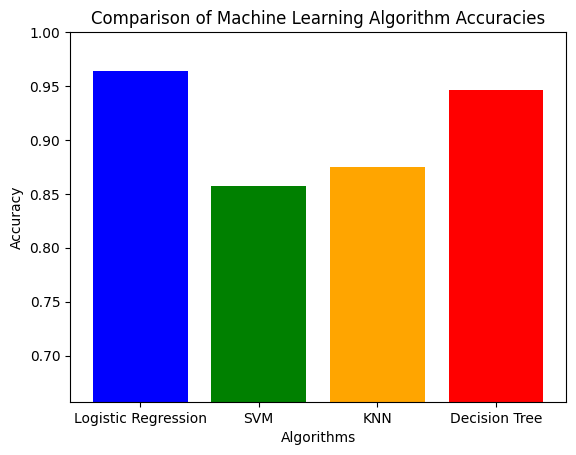

In [ ]:

# Algorithms and their accuracies
algorithms = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
accuracies = [log_acc, svm_acc, knn_acc, dt_acc]

# Create bar chart
plt.bar(algorithms, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning Algorithm Accuracies')
plt.ylim(min(accuracies) - 0.2, 1.0)
plt.show()


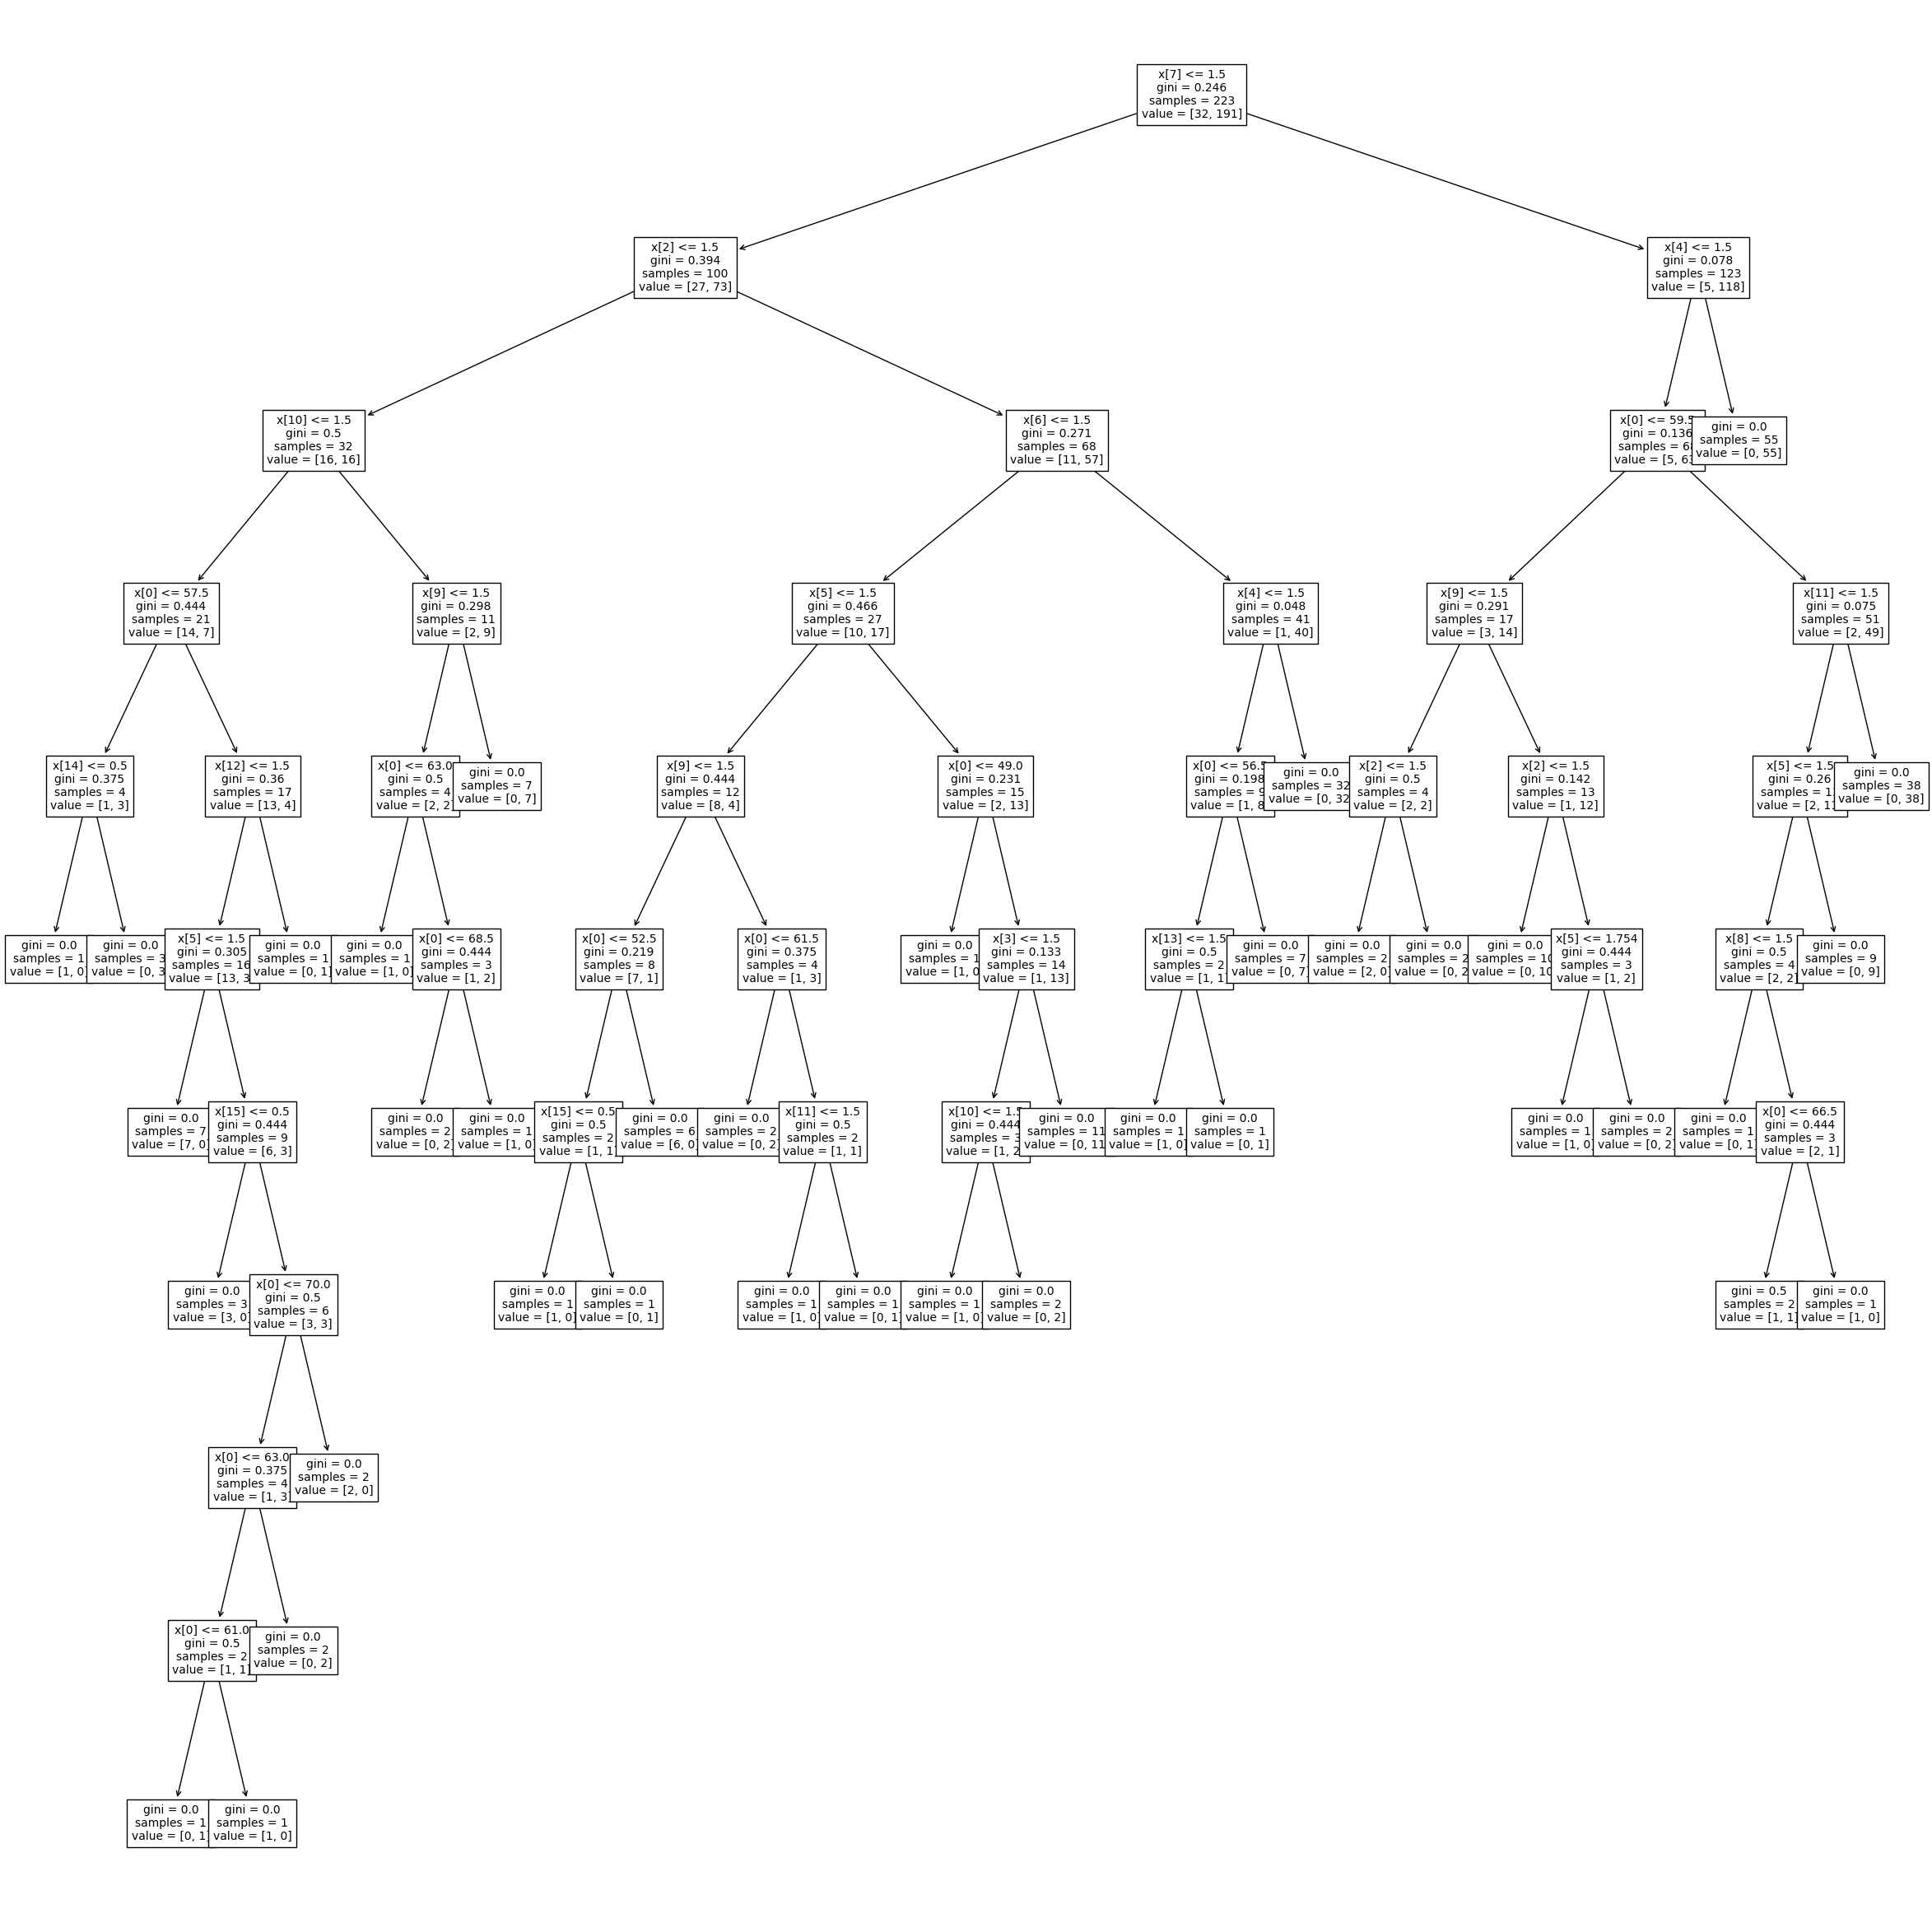

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(decision_tree,fontsize=10)
plt.show()

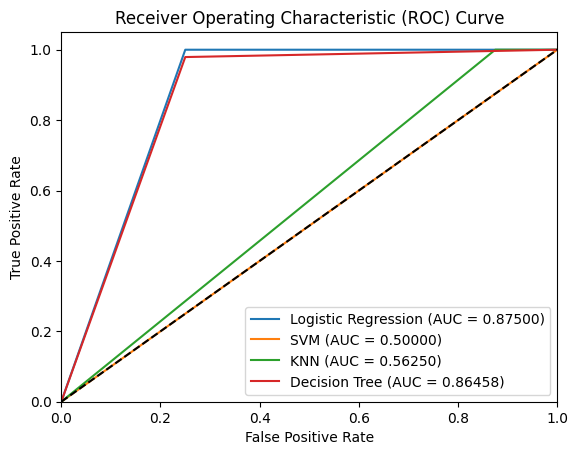

In [ ]:
y_true_lr = y_test
y_scores_lr = logistic_regression_pred

y_true_svm = y_test
y_scores_svm = svm_pred

y_true_knn = y_test
y_scores_knn = knn_pred

y_true_dt = y_test
y_scores_dt = decision_tree_pred

fpr_lr, tpr_lr, _ = roc_curve(y_true_lr, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_true_svm, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_knn, tpr_knn, _ = roc_curve(y_true_knn, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_true_dt, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.5f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.5f)' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.5f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.5f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

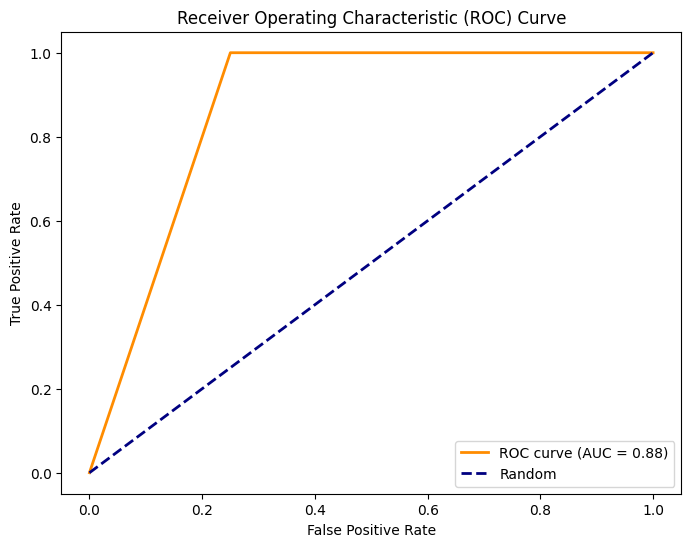

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, logistic_regression_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

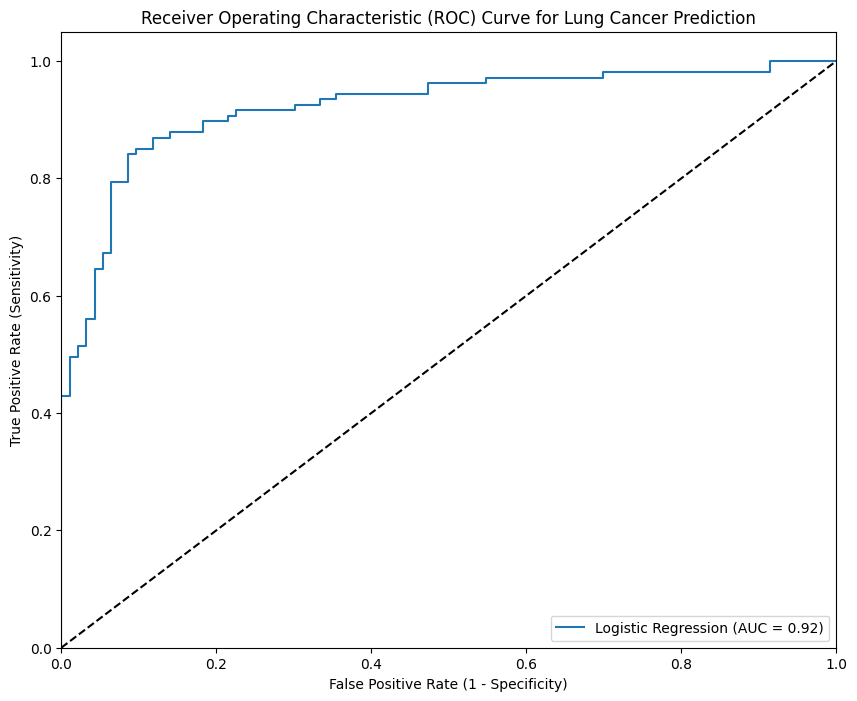

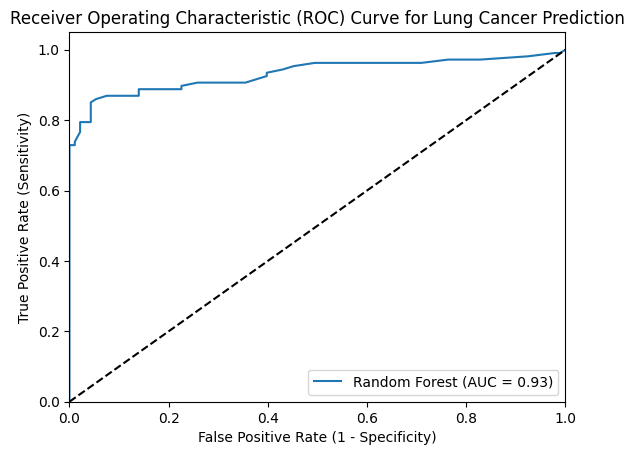

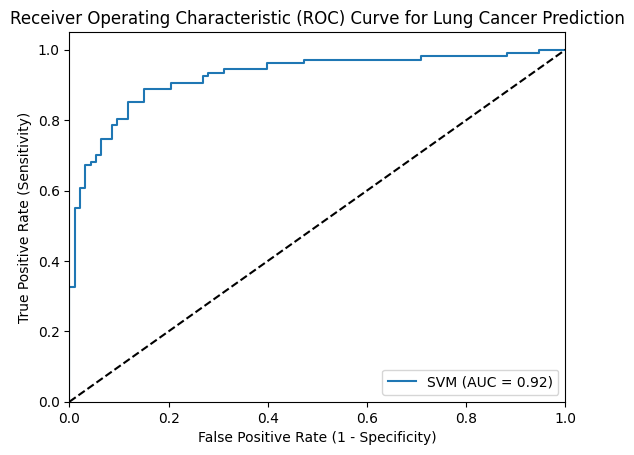

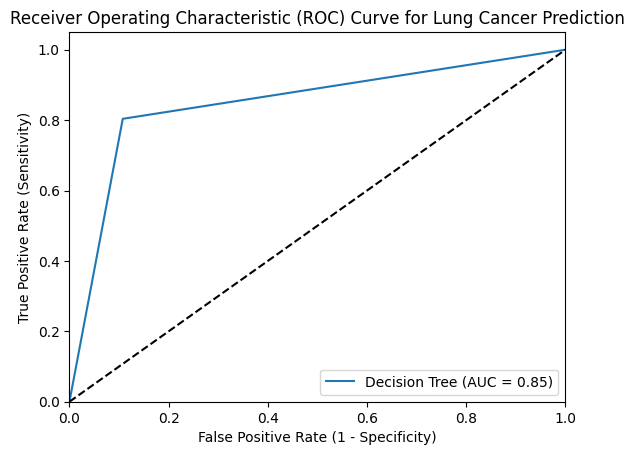

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier()
}

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict probabilities for positive class
    probs = model.predict_proba(X_test)[:, 1]
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    # Calculate AUC
    auc = roc_auc_score(y_test, probs)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')

    # Set plot labels and title
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Lung Cancer Prediction')
    plt.legend(loc="lower right")
    plt.show()
# Plot random guess line



In [ ]:
algorithms = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
y_pred = {
    'Logistic Regression': logistic_regression_pred,
    'SVM': svm_pred,
    'KNN': knn_pred,
    'Decision Tree': decision_tree_pred
}

# Create confusion matrix for each algorithm
for algorithm in algorithms:
    cm = confusion_matrix(y_test, y_pred[algorithm])
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {algorithm}')
    plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [200, 56]

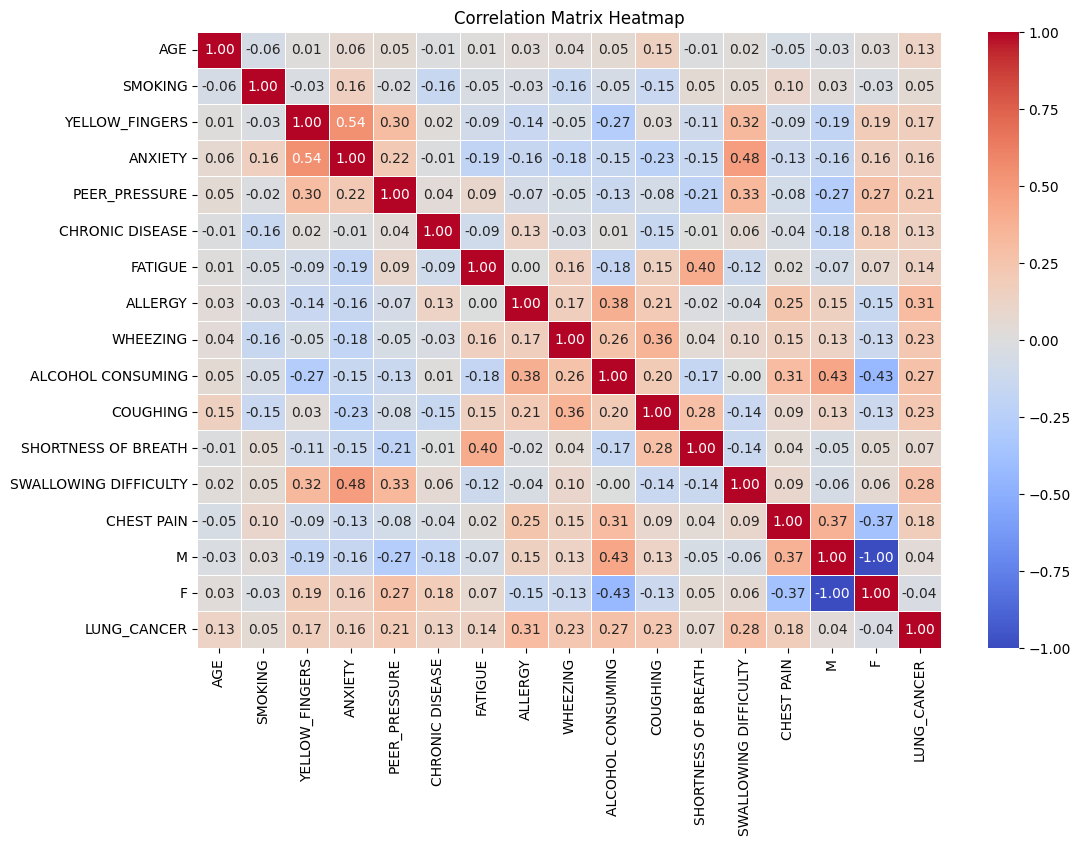

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Loading all libraries

In [ ]:
df = pd.read_csv("lung_cancer_s.csv")

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,F,61,2,2,2,1,1,2,1,2,1,1,1,1,2,YES
1,M,64,1,2,2,2,1,2,2,1,2,1,2,2,2,YES
2,F,68,1,2,1,2,2,1,1,2,1,2,1,1,1,YES
3,M,67,1,2,2,1,2,2,1,2,2,1,2,1,2,YES
4,M,62,2,1,1,1,2,2,2,2,2,2,2,2,2,YES


In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,62.833000,1.564000,1.530000,1.469000,1.476000,1.517000,1.657000,1.54800,1.561000,1.560000,1.560000,1.59400,1.400000,1.571000
std,7.883734,0.496135,0.499349,0.499288,0.499674,0.499961,0.474949,0.49794,0.496513,0.496635,0.496635,0.49133,0.490143,0.495181
min,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
50%,63.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,1.000000,2.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
max,84.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000


# Oversampling the dataset

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# X = df.iloc[:, 0:len(df.columns) - 1]
# y = df.iloc[:, len(df.columns) - 1]
# ros = RandomOverSampler(random_state=42)
# X_ros, y_ros = ros.fit_resample(X, y)
# X_ros_df = pd.DataFrame(X_ros, columns=X.columns)
# y_ros_df = pd.Series(y_ros, name=y.name)
# df_ros = pd.concat([X_ros_df, y_ros_df], axis=1)
# df = df_ros.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 1000 non-null   object
 1   AGE                    1000 non-null   int64 
 2   SMOKING                1000 non-null   int64 
 3   YELLOW_FINGERS         1000 non-null   int64 
 4   ANXIETY                1000 non-null   int64 
 5   PEER_PRESSURE          1000 non-null   int64 
 6   CHRONIC DISEASE        1000 non-null   int64 
 7   FATIGUE                1000 non-null   int64 
 8   ALLERGY                1000 non-null   int64 
 9   WHEEZING               1000 non-null   int64 
 10  ALCOHOL CONSUMING      1000 non-null   int64 
 11  COUGHING               1000 non-null   int64 
 12  SHORTNESS OF BREATH    1000 non-null   int64 
 13  SWALLOWING DIFFICULTY  1000 non-null   int64 
 14  CHEST PAIN             1000 non-null   int64 
 15  LUNG_CANCER           

# Preprocessing

# Checking for null values

In [ ]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# Removing null values

In [ ]:
df["PEER_PRESSURE"] = df["PEER_PRESSURE"].fillna(df["PEER_PRESSURE"].mode()[0])
df['CHRONIC DISEASE'] = df['CHRONIC DISEASE'].fillna(df['CHRONIC DISEASE'].mean())
df['ALCOHOL CONSUMING'] = df['ALCOHOL CONSUMING'].fillna(df['ALCOHOL CONSUMING'].median())
df['ALLERGY'] = df['ALLERGY'].fillna(df['ALLERGY'].median())
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

# Removing duplicate values

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 1000 non-null   object
 1   AGE                    1000 non-null   int64 
 2   SMOKING                1000 non-null   int64 
 3   YELLOW_FINGERS         1000 non-null   int64 
 4   ANXIETY                1000 non-null   int64 
 5   PEER_PRESSURE          1000 non-null   int64 
 6   CHRONIC DISEASE        1000 non-null   int64 
 7   FATIGUE                1000 non-null   int64 
 8   ALLERGY                1000 non-null   int64 
 9   WHEEZING               1000 non-null   int64 
 10  ALCOHOL CONSUMING      1000 non-null   int64 
 11  COUGHING               1000 non-null   int64 
 12  SHORTNESS OF BREATH    1000 non-null   int64 
 13  SWALLOWING DIFFICULTY  1000 non-null   int64 
 14  CHEST PAIN             1000 non-null   int64 
 15  LUNG_CANCER           

# Encoding values in GENDER AND LUNG_CANCER columns

In [ ]:
label_encoder = LabelEncoder()
df = pd.get_dummies(df, columns=['GENDER'])
df["GENDER_F"] = label_encoder.fit_transform(df["GENDER_F"])
df["GENDER_M"] = label_encoder.fit_transform(df["GENDER_M"])
df["F"] = df["GENDER_F"]
df["M"] = df["GENDER_M"]
df.drop(columns=["GENDER_F", "GENDER_M"], inplace=True)
df["LUNG_CANCER"] = label_encoder.fit_transform(df["LUNG_CANCER"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    1000 non-null   int64
 1   SMOKING                1000 non-null   int64
 2   YELLOW_FINGERS         1000 non-null   int64
 3   ANXIETY                1000 non-null   int64
 4   PEER_PRESSURE          1000 non-null   int64
 5   CHRONIC DISEASE        1000 non-null   int64
 6   FATIGUE                1000 non-null   int64
 7   ALLERGY                1000 non-null   int64
 8   WHEEZING               1000 non-null   int64
 9   ALCOHOL CONSUMING      1000 non-null   int64
 10  COUGHING               1000 non-null   int64
 11  SHORTNESS OF BREATH    1000 non-null   int64
 12  SWALLOWING DIFFICULTY  1000 non-null   int64
 13  CHEST PAIN             1000 non-null   int64
 14  LUNG_CANCER            1000 non-null   int32
 15  F                      1000 non-null   

# Changing column positions

In [ ]:
df = df[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY',
         'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'M',
         'F', 'LUNG_CANCER']]
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,M,F,LUNG_CANCER
0,61,2,2,2,1,1,2,1,2,1,1,1,1,2,0,1,1
1,64,1,2,2,2,1,2,2,1,2,1,2,2,2,1,0,1
2,68,1,2,1,2,2,1,1,2,1,2,1,1,1,0,1,1
3,67,1,2,2,1,2,2,1,2,2,1,2,1,2,1,0,1
4,62,2,1,1,1,2,2,2,2,2,2,2,2,2,1,0,1


# Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,
                                                    random_state=42)

logistic_regression = LogisticRegression(max_iter=5000)
logistic_regression.fit(X_train, y_train)
logistic_regression_pred = logistic_regression.predict(X_test)
log_acc = accuracy_score(y_test, logistic_regression_pred)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, logistic_regression_pred))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_test, logistic_regression_pred))
print("Logistic Regression Classification Report: \n",
      classification_report(y_test, logistic_regression_pred, zero_division='warn'))

Logistic Regression Accuracy:  0.885
Logistic Regression Confusion Matrix: 
 [[  0  22]
 [  1 177]]
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.89      0.99      0.94       178

    accuracy                           0.89       200
   macro avg       0.44      0.50      0.47       200
weighted avg       0.79      0.89      0.84       200



# SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,random_state=42)
svm = SVM_MODEL.SVC(max_iter=15000)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy: ", accuracy_score(y_test, svm_pred))
print("SVM Confusion Matrix: \n", confusion_matrix(y_test, svm_pred))
print("SVM Classification Report: \n", classification_report(y_test, svm_pred, zero_division='warn'))


SVM Accuracy:  0.89
SVM Confusion Matrix: 
 [[  0  22]
 [  0 178]]
SVM Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.89      1.00      0.94       178

    accuracy                           0.89       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.79      0.89      0.84       200



c:\Users\Rohithk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rohithk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Rohithk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

# KNN

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,
                                                    random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy: ", accuracy_score(y_test, knn_pred))
print("KNN Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))
print("KNN Classification Report: \n", classification_report(y_test, knn_pred, zero_division='warn'))


KNN Accuracy:  0.88
KNN Confusion Matrix: 
 [[  0  22]
 [  2 176]]
KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.89      0.99      0.94       178

    accuracy                           0.88       200
   macro avg       0.44      0.49      0.47       200
weighted avg       0.79      0.88      0.83       200



# Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,random_state=42)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
dt_acc = accuracy_score(y_test, decision_tree_pred)
print("Decision Tree Accuracy: ", accuracy_score(y_test, decision_tree_pred))
print("Decision Tree Confusion Matrix: \n", confusion_matrix(y_test, decision_tree_pred))
print("Decision Tree Classification Report: \n",
      classification_report(y_test, decision_tree_pred, zero_division='warn'))


Decision Tree Accuracy:  0.75
Decision Tree Confusion Matrix: 
 [[  4  18]
 [ 32 146]]
Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.11      0.18      0.14        22
           1       0.89      0.82      0.85       178

    accuracy                           0.75       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.80      0.75      0.78       200



# Using Stratified K-Fold splitting - Logistic Regression

In [ ]:
stratified_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_log_acc = 0
for train_index, test_index in stratified_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        logistic_regression = LogisticRegression(max_iter=5000)
        logistic_regression.fit(X_train, y_train)
        logistic_regression_pred = logistic_regression.predict(X_test)
        log_acc = accuracy_score(y_test, logistic_regression_pred)
        max_log_acc = max(max_log_acc, log_acc)
        print("Logistic Regression Accuracy: ", accuracy_score(y_test, logistic_regression_pred))
print("Max Logistic Regression Accuracy: ", max_log_acc)

Logistic Regression Accuracy:  0.87
Logistic Regression Accuracy:  0.865
Logistic Regression Accuracy:  0.87
Logistic Regression Accuracy:  0.865
Logistic Regression Accuracy:  0.865
Max Logistic Regression Accuracy:  0.87


# Using K-Fold splitting - Logistic Regression

In [ ]:
kfsplit = KFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_log_acc = 0
for train_index, test_index in kfsplit.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        logistic_regression = LogisticRegression(max_iter=5000)
        logistic_regression.fit(X_train, y_train)
        logistic_regression_pred = logistic_regression.predict(X_test)
        log_acc = accuracy_score(y_test, logistic_regression_pred)
        max_log_acc = max(max_log_acc, log_acc)
        print("Logistic Regression Accuracy: ", accuracy_score(y_test, logistic_regression_pred))
print("Max Logistic Regression Accuracy: ", max_log_acc)

Logistic Regression Accuracy:  0.885
Logistic Regression Accuracy:  0.865
Logistic Regression Accuracy:  0.88
Logistic Regression Accuracy:  0.87
Logistic Regression Accuracy:  0.835
Max Logistic Regression Accuracy:  0.885


# Using Stratified K-Fold splitting - SVM

In [ ]:
stratified_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_svm_acc = 0
for train_index, test_index in stratified_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        svm_model = SVM_MODEL.SVC(max_iter=1000)
        svm_model.fit(X_train, y_train)
        svm_pred = svm_model.predict(X_test)
        svm_acc = accuracy_score(y_test, svm_pred)
        max_svm_acc = max(max_svm_acc, svm_acc)
        print("SVM Accuracy: ", accuracy_score(y_test, svm_pred))
print("Max SVM Accuracy: ", max_svm_acc)

SVM Accuracy:  0.87
SVM Accuracy:  0.87
SVM Accuracy:  0.87
SVM Accuracy:  0.865
SVM Accuracy:  0.865
Max SVM Accuracy:  0.87


# Using K-Fold splitting - SVM

In [ ]:
kfsplit = KFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_svm_acc = 0
for train_index, test_index in kfsplit.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        svm_model = SVM_MODEL.SVC(max_iter=1000)
        svm_model.fit(X_train, y_train)
        svm_pred = svm_model.predict(X_test)
        svm_acc = accuracy_score(y_test, svm_pred)
        max_svm_acc = max(max_svm_acc, svm_acc)
        print("SVM Accuracy: ", accuracy_score(y_test, svm_pred))
print("Max SVM Accuracy: ", max_svm_acc)

SVM Accuracy:  0.89
SVM Accuracy:  0.865
SVM Accuracy:  0.88
SVM Accuracy:  0.87
SVM Accuracy:  0.835
Max SVM Accuracy:  0.89


# Using Stratified K-Fold splitting - KNN

In [ ]:
stratified_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_knn_acc = 0
for train_index, test_index in stratified_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        knn = KNeighborsClassifier()
        knn.fit(X_train, y_train)
        knn_pred = knn.predict(X_test)
        knn_acc = accuracy_score(y_test, knn_pred)
        max_knn_acc = max(max_knn_acc, knn_acc)
        print("KNN Accuracy: ", accuracy_score(y_test, knn_pred))
print("Max KNN Accuracy: ", max_knn_acc)

KNN Accuracy:  0.835
KNN Accuracy:  0.855
KNN Accuracy:  0.87
KNN Accuracy:  0.855
KNN Accuracy:  0.865
Max KNN Accuracy:  0.87


# Using K-Fold splitting - KNN

In [ ]:
kfsplit = KFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_knn_acc = 0
for train_index, test_index in kfsplit.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        knn = KNeighborsClassifier()
        knn.fit(X_train, y_train)
        knn_pred = knn.predict(X_test)
        knn_acc = accuracy_score(y_test, knn_pred)
        max_knn_acc = max(max_knn_acc, knn_acc)
        print("KNN Accuracy: ", accuracy_score(y_test, knn_pred))
print("Max KNN Accuracy: ", max_knn_acc)
knn_acc = max(knn_acc,max_knn_acc)

KNN Accuracy:  0.86
KNN Accuracy:  0.85
KNN Accuracy:  0.88
KNN Accuracy:  0.855
KNN Accuracy:  0.82
Max KNN Accuracy:  0.88


# Using Stratified K-Fold splitting - Decision Tree

In [ ]:
stratified_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_dt_acc = 0
for train_index, test_index in stratified_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        decision_tree = DecisionTreeClassifier()
        decision_tree.fit(X_train, y_train)
        decision_tree_pred = decision_tree.predict(X_test)
        dt_acc = accuracy_score(y_test, decision_tree_pred)
        max_dt_acc = max(max_dt_acc, dt_acc)
        print("Decision Tree Accuracy: ", accuracy_score(y_test, decision_tree_pred))
print("Max Decision Tree Accuracy: ", max_dt_acc)
dt_acc = max(dt_acc, max_dt_acc)


Decision Tree Accuracy:  0.78
Decision Tree Accuracy:  0.755
Decision Tree Accuracy:  0.765
Decision Tree Accuracy:  0.8
Decision Tree Accuracy:  0.745
Max Decision Tree Accuracy:  0.8


# Using K-Fold splitting - Decision Tree

In [ ]:
kfsplit = KFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_dt_acc = 0
for train_index, test_index in kfsplit.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        decision_tree = DecisionTreeClassifier()
        decision_tree.fit(X_train, y_train)
        decision_tree_pred = decision_tree.predict(X_test)
        dt_acc = accuracy_score(y_test, decision_tree_pred)
        max_dt_acc = max(max_dt_acc, dt_acc)
        print("Decision Tree Accuracy: ", accuracy_score(y_test, decision_tree_pred))
print("Max Decision Tree Accuracy: ", max_dt_acc)
dt_acc = max(dt_acc, max_dt_acc)

Decision Tree Accuracy:  0.775
Decision Tree Accuracy:  0.685
Decision Tree Accuracy:  0.755
Decision Tree Accuracy:  0.735
Decision Tree Accuracy:  0.755
Max Decision Tree Accuracy:  0.775


# Graphs


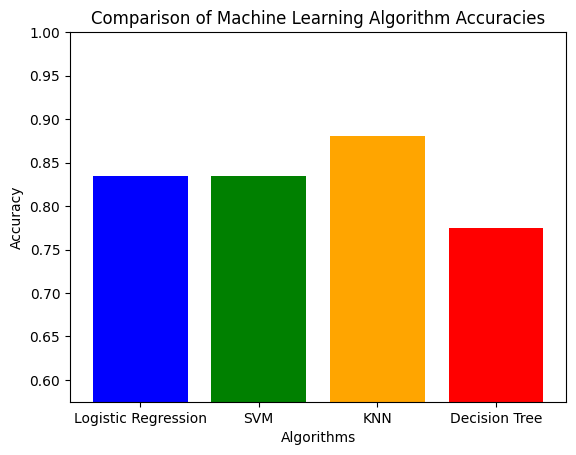

In [ ]:

# Algorithms and their accuracies
algorithms = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
accuracies = [log_acc, svm_acc, knn_acc, dt_acc]

# Create bar chart
plt.bar(algorithms, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning Algorithm Accuracies')
plt.ylim(min(accuracies) - 0.2, 1.0)
plt.show()


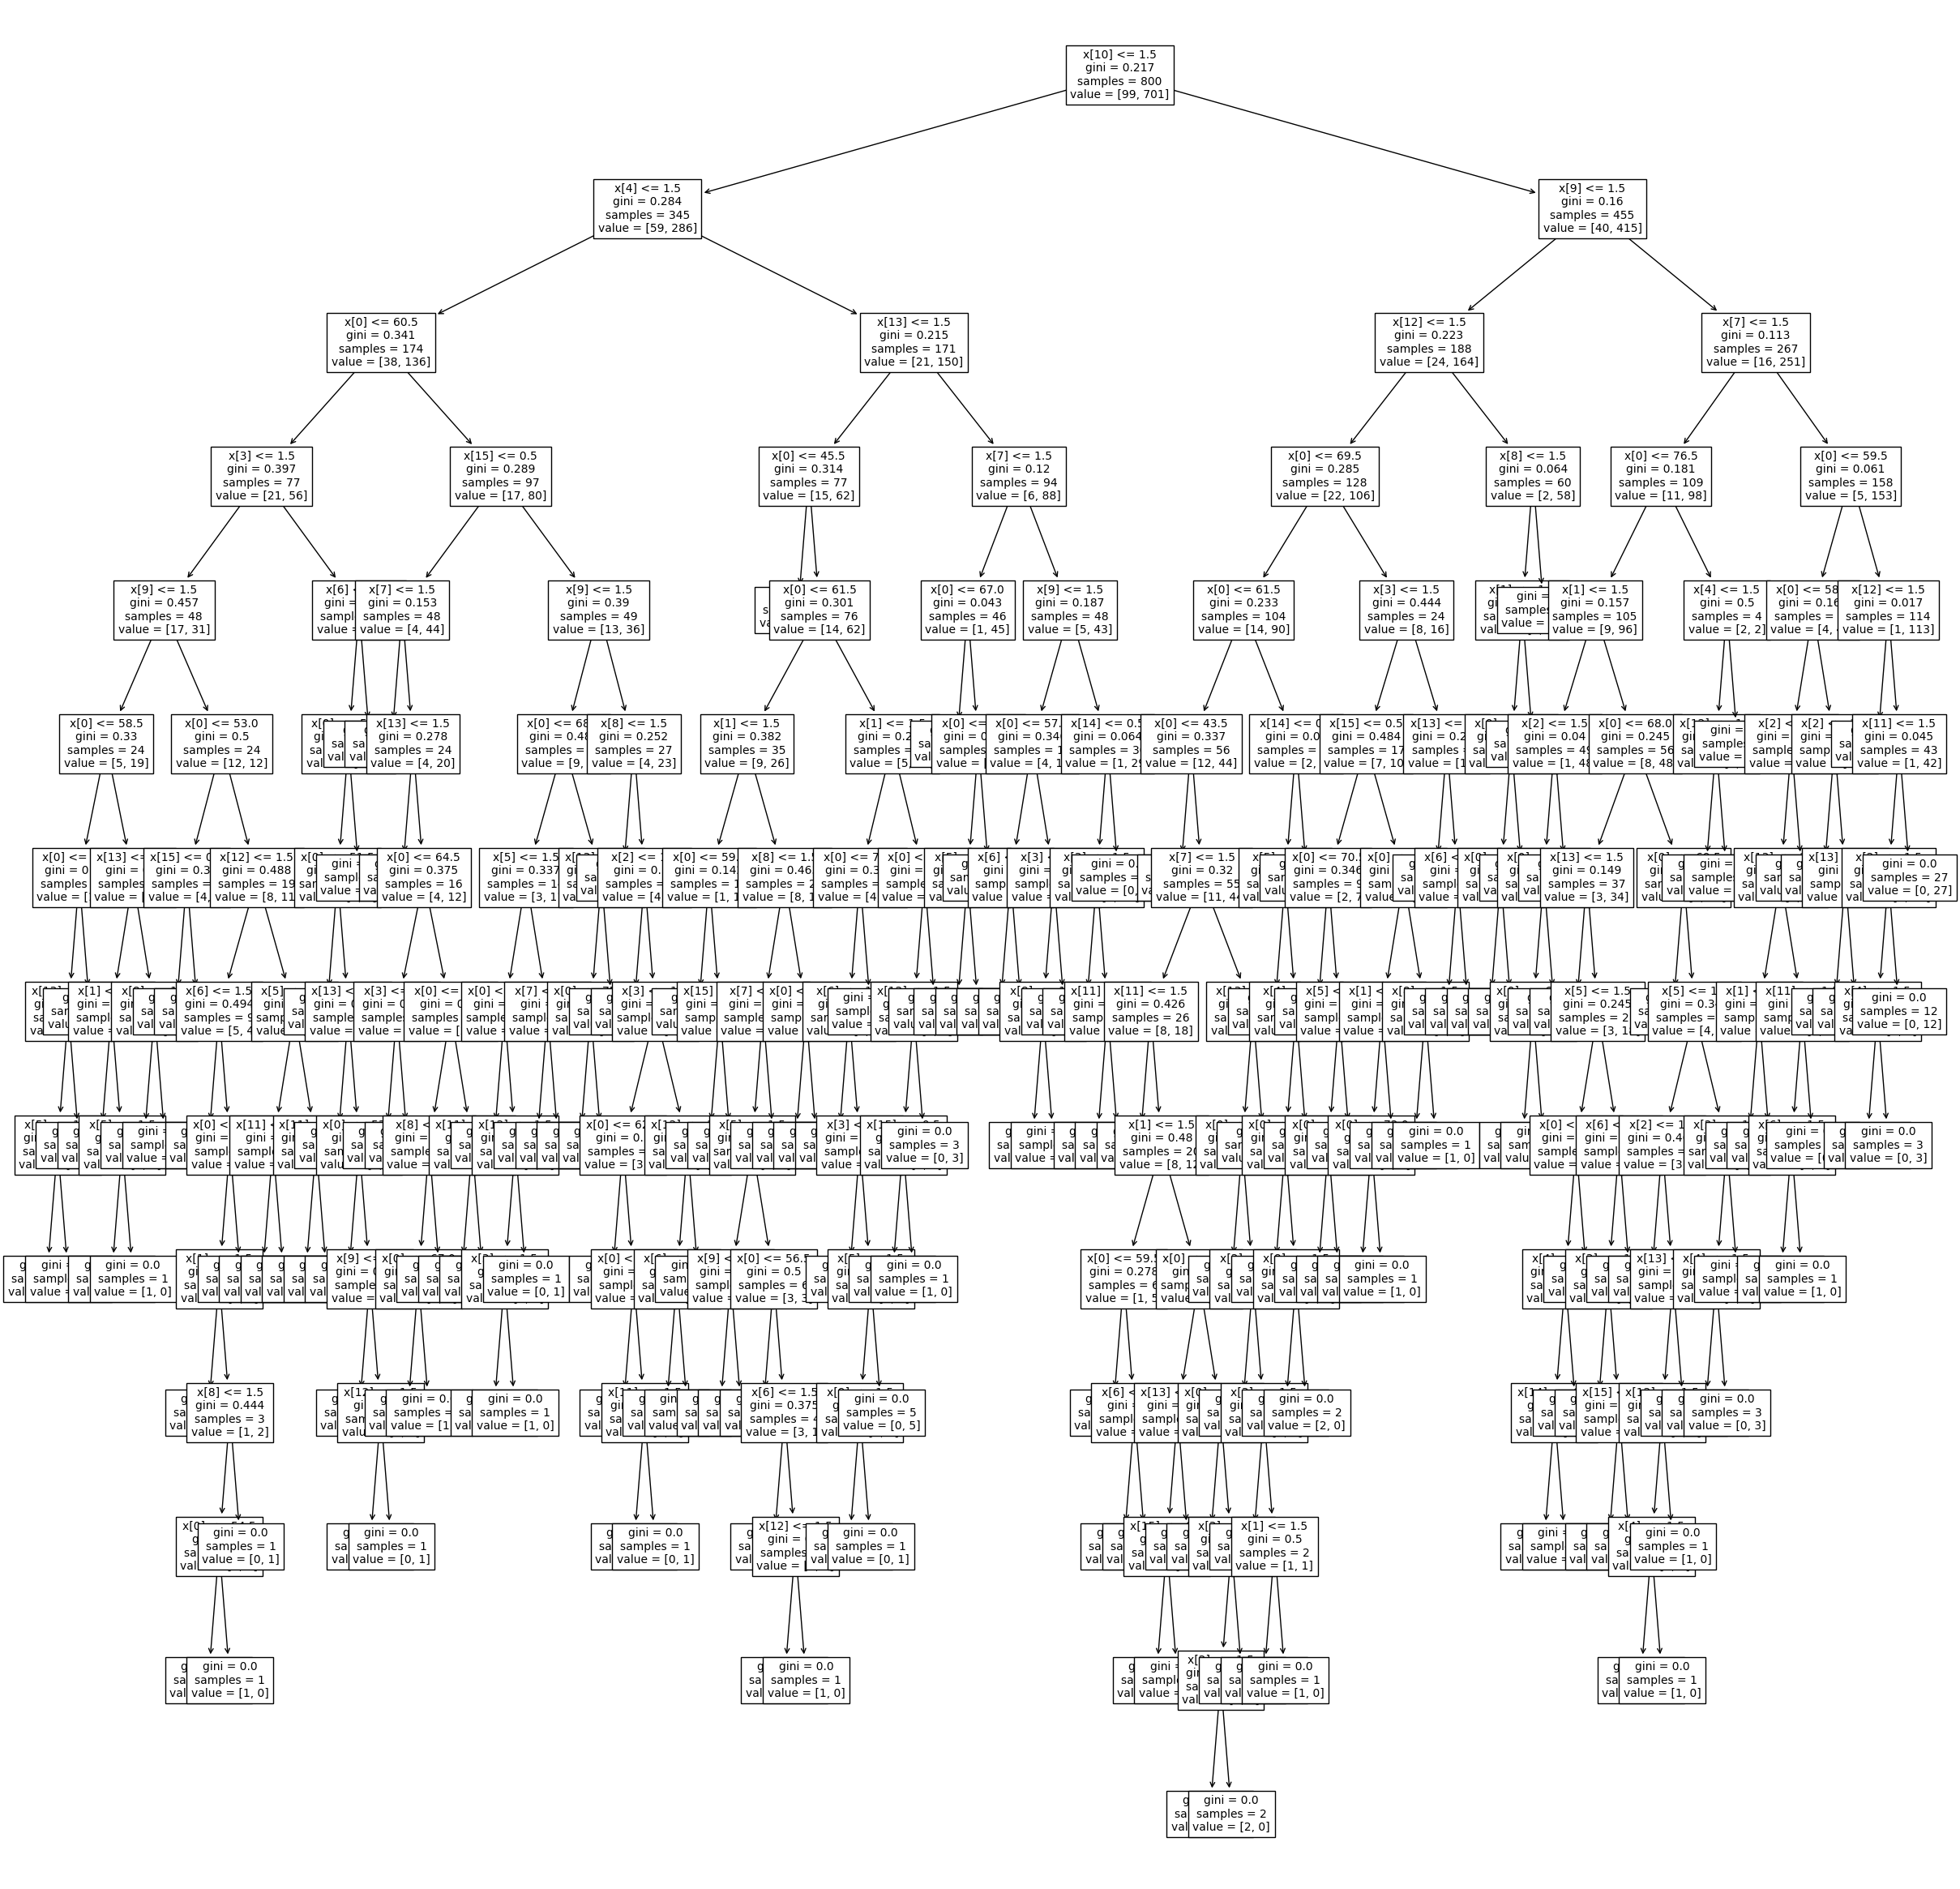

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(decision_tree,fontsize=10)
plt.show()

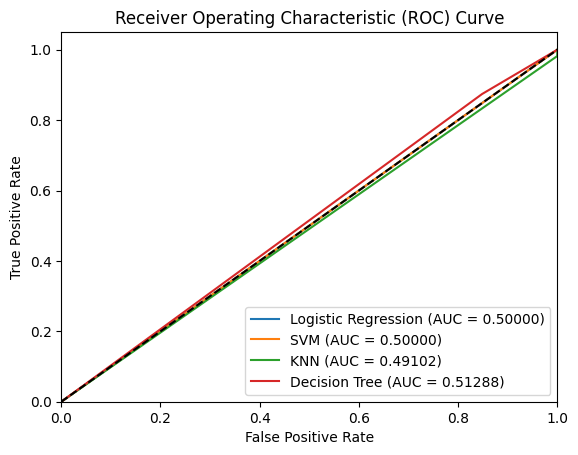

In [ ]:
y_true_lr = y_test
y_scores_lr = logistic_regression_pred

y_true_svm = y_test
y_scores_svm = svm_pred

y_true_knn = y_test
y_scores_knn = knn_pred

y_true_dt = y_test
y_scores_dt = decision_tree_pred

fpr_lr, tpr_lr, _ = roc_curve(y_true_lr, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_true_svm, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_knn, tpr_knn, _ = roc_curve(y_true_knn, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_true_dt, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt) 

plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.5f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.5f)' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.5f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.5f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

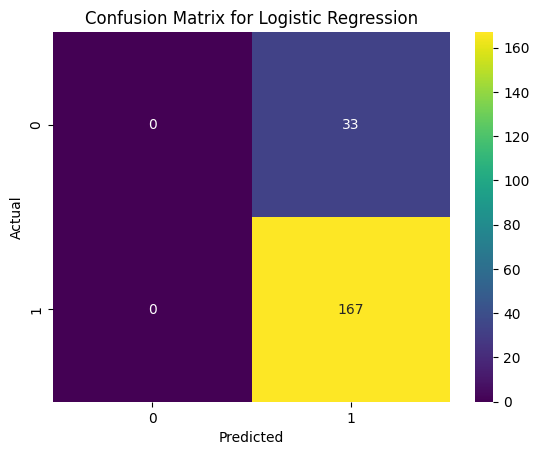

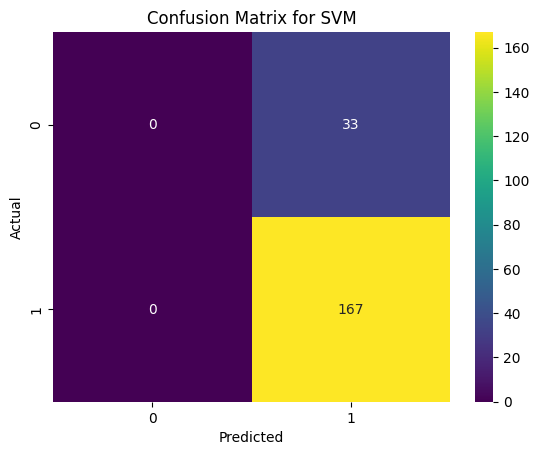

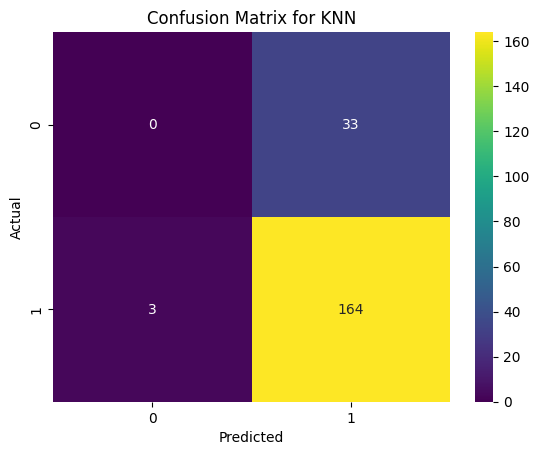

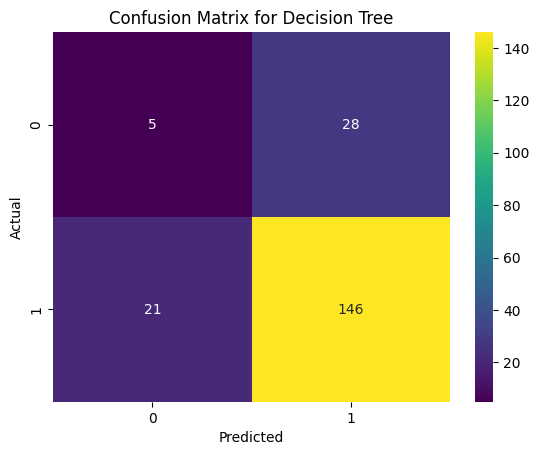

In [ ]:
algorithms = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
y_pred = {
    'Logistic Regression': logistic_regression_pred,
    'SVM': svm_pred,
    'KNN': knn_pred,
    'Decision Tree': decision_tree_pred
}

# Create confusion matrix for each algorithm
for algorithm in algorithms:
    cm = confusion_matrix(y_test, y_pred[algorithm])
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {algorithm}')
    plt.show()


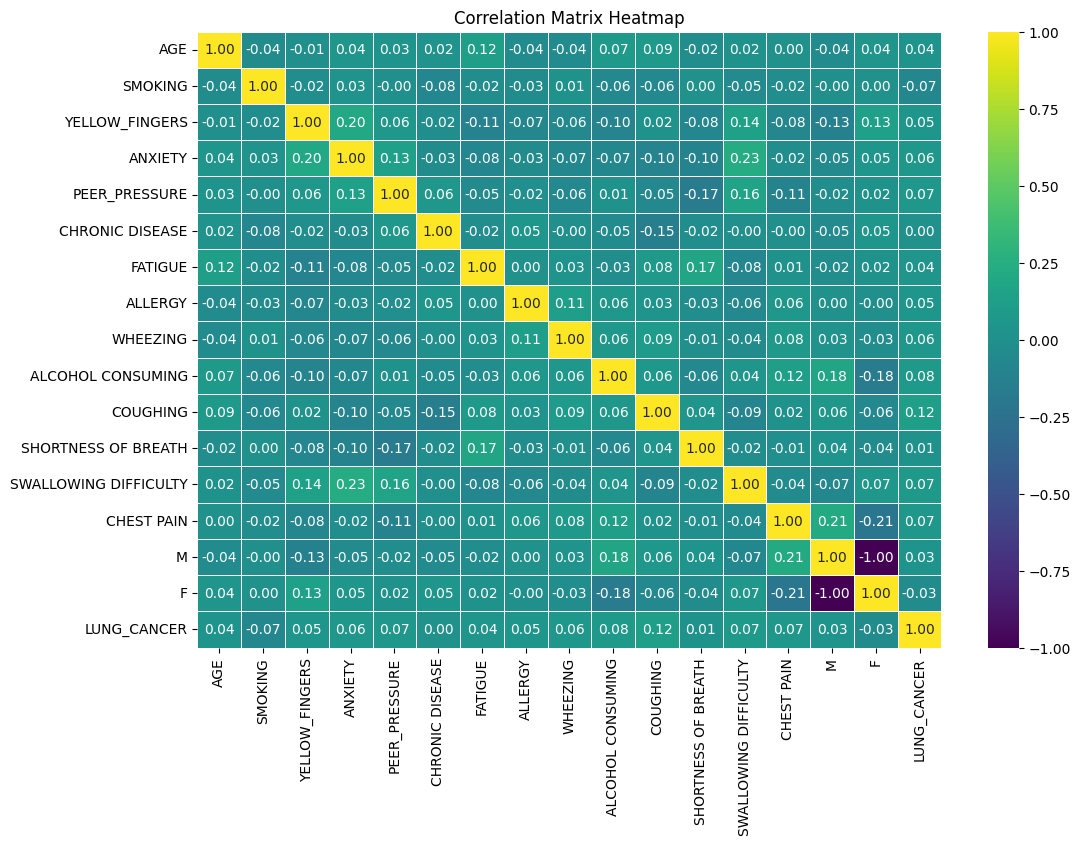

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()